In [ ]:
!pip install opencv-python --upgrade

'wget' is not recognized as an internal or external command,
operable program or batch file.


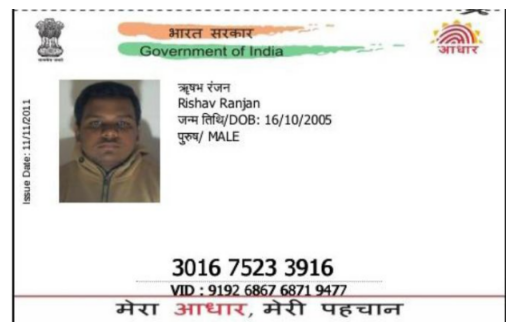

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Download the image directly using the raw image URL:
!wget -O image.jpg https://raw.githubusercontent.com/Samarburnwal/E-KYC_Computer_Vision/main/aadharImages/aadhar.png

img = cv2.imread("Screenshot 2025-04-18 120905.png")

# Check if the image was loaded successfully
if img is None:
    print("Error: Could not load image. Please check the image path or download.")
else:
    # Convert from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.figure()
    plt.imshow(img)
    plt.axis('off')
    plt.show()

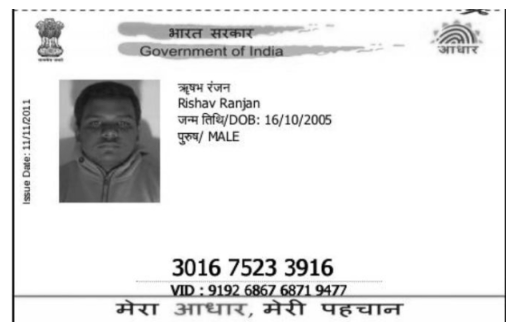

In [10]:
gray1 =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray1, cmap='gray')
plt.axis("off")
plt.show()

In [11]:
#Mean Blurred


In [12]:
# blurred =  cv2.GaussianBlur(gray, (5, 5), 0)

# plt.imshow(blurred, cmap='gray')
# plt.axis("off")
# plt.show()

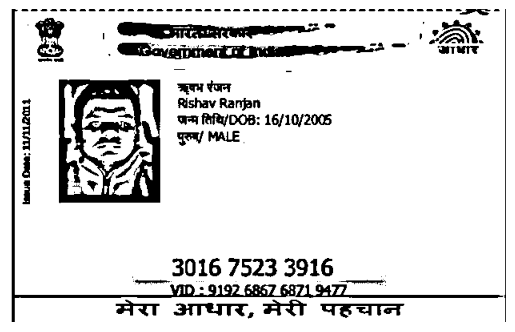

True

In [13]:
#adaptive thresholding

adp_thresh1 = cv2.adaptiveThreshold(gray1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 2)

plt.imshow(adp_thresh1, cmap='Greys_r')
plt.axis("off")
plt.show()

cv2.imwrite("image.jpg", adp_thresh1)

'wget' is not recognized as an internal or external command,
operable program or batch file.


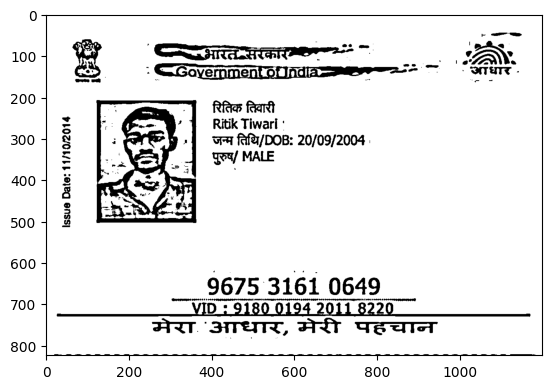

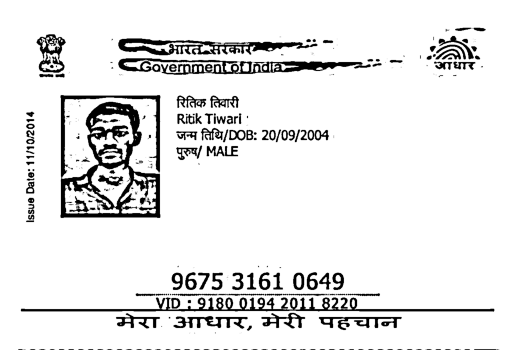

contours (0, 0, 1200, 824)
Area 985524.5


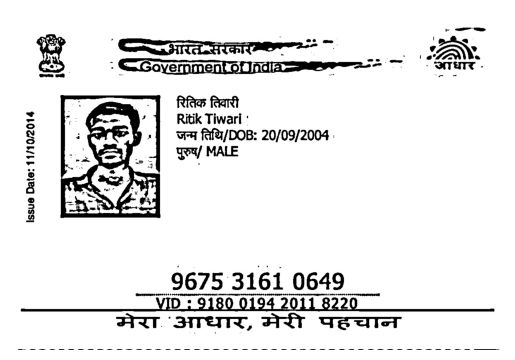

In [8]:
# Download the image directly using the raw image URL:
!wget -O image.jpg https://raw.githubusercontent.com/Samarburnwal/E-KYC_Computer_Vision/main/aadharImages/aadhar.png

img = cv2.imread("image.jpg")

# Check if the image was loaded successfully
if img is None:
    print("Error: Could not load image. Please check the image path or download.")
else:
    # Convert from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Graying the image

gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')
plt.show()

adp_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 2)

plt.imshow(adp_thresh, cmap='Greys_r')
plt.axis("off")
plt.show()

cv2.imwrite("image.jpg",adp_thresh)

contours, _ = cv2.findContours(adp_thresh, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)

# Select the largest contour (assuming the ID card is the largest object)
largest_contour = None
largest_area = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > largest_area:
        largest_contour = cnt
        largest_area = area

x, y, w, h = cv2.boundingRect(largest_contour)

print("contours", (x, y, w, h))
print("Area", largest_area)
contour_id = img[y:y+h, x:x+w]

plt.imshow(contour_id)
plt.axis('off')
plt.show()

In [3]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [11]:
import easyocr


# Initialize EasyOCR with English language
reader = easyocr.Reader(['en'])

# Save the cropped contour image
contour_path = "image.png"
cv2.imwrite(contour_path, contour_id)  # Ensure `contour_id` contains the cropped image

# Perform OCR on the extracted region
result = reader.readtext(contour_path)

# Extract and print detected text
extracted_text = [word_info[1] for word_info in result]  # Extracting text

print("\nExtracted Text:\n", "\n".join(extracted_text))


Extracted Text:
 Hd Tn
TT
Name:
PRIYANKA KUMARI
5FT
anG
DOB: 1995-17-06
Afacht
Female
9147385602
